In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import seaborn as sns

In [2]:
DATA_PATH = 'data/data.csv'

In [3]:
# Display all of the columns when data are shown
pd.set_option('display.max_columns', 60) 

# Set up graphs
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['figure.dpi'] = 80
plt.rcParams['axes.facecolor'] = 'FFFFFF'
plt.rcParams['legend.facecolor'] = 'FFFFFF'

# **Data.csv insights**

In [4]:
data =  pd.read_csv(DATA_PATH, sep=',', parse_dates=['doc_date', 'created_at'], low_memory=False)
data.head()

,order_price_without_vat,order_price_with_vat,bill_country,setting_currency_id,created_at,shop_basket_id,doc_date,exchange_currency_rate,source,canceled_date,currency_code,currency_symbol,price_round_system,basket_total_price_before_discount_with_vat,basket_total_price_with_vat,count_basket_items,basket_count_products,basket_type,item_quantity,item_type,item_unit_price_with_vat,item_unit_price_without_vat,item_total_discount_with_vat,product_id,product_code,catalog_category_id,catalog_brand_id,product_name,product_status,reviews_count,reviews_average_score_price,reviews_average_score_quality,reviews_average_score_properties,reviews_average_score_overall,reviews_average_score,is_in_stock,is_ended,is_new,is_boosted,product_purchase_price,eshop_stock_count,is_fifo,product_name_parameterize,category,tree_path,category_name_parameterized,category_status,catalog_segment_id,categories_ancestor_ids,categories_descendant_ids,category_full_name_path,default_warranty_period,brand_name,brand_parameterized,segment_name,segment_parameterized,segment_status
0,562.29,674.75,BG,1,2020-04-26 19:25:20.842503,1136409,2020-04-26,1.9558,eshop,NaN,BGN,лв,0,759.0,674.75,18,18,standard,1,standard,10.45,8.70833,0.55,39848,225542,179.0,145,MC-2,active,83,95.192308,93.653846,93.653846,94.423077,94.277108,t,f,f,f,2.205000,-2.0,f,mc-2,Kapodastre pre gitaru s kovovými strunami,001:001:019:001,kapodastre-pre-gitaru-s-kovovymi-strunami,active,1.0,"{3,4,178}",{},"{Music,Guitars,Capos,""Capo for acoustic guitar""}",24.0,Musedo,musedo,Music,music,active
1,562.29,674.75,BG,1,2020-04-26 19:25:20.842503,1136409,2020-04-26,1.9558,eshop,NaN,BGN,лв,0,759.0,674.75,18,18,standard,1,standard,5.70,4.75000,0.30,140119,305503,762.0,109,TGC026 1m,active,1,0.000000,0.000000,0.000000,0.000000,100.000000,f,f,f,f,1.385000,0.0,f,tgc026-1m,Hotové nástrojové káble,001:005:010:001:001,hotove-nastrojove-kable,active,1.0,"{3,607,760,761}",{},"{Music,""Studio / PA"",Cables,""Complete Cables"",...",24.0,Lewitz,lewitz,Music,music,active
2,562.29,674.75,BG,1,2020-04-26 19:25:20.842503,1136409,2020-04-26,1.9558,eshop,NaN,BGN,лв,0,759.0,674.75,18,18,standard,1,standard,0.95,0.79167,0.05,34663,220357,153.0,13,351 Shape Premium Pick Medium White Moto,active,46,92.258065,93.225806,94.516129,94.193548,94.804348,t,f,f,f,0.164984,303.0,f,351-shape-premium-pick-medium-white-moto,Medium trsátka,001:001:015:002,medium-trsatka,active,1.0,"{3,4,151}",{},"{Music,Guitars,""Guitar Picks"",""Medium Picks""}",24.0,Fender,fender,Music,music,active
3,562.29,674.75,BG,1,2020-04-26 19:25:20.842503,1136409,2020-04-26,1.9558,eshop,NaN,BGN,лв,0,759.0,674.75,18,18,standard,1,standard,9.50,7.91667,0.50,63176,248871,192.0,320,536501 Foot Rest Blue,active,10,92.500000,87.500000,92.500000,90.000000,92.500000,t,f,f,f,3.243455,55.0,f,536501-foot-rest-blue,Gitarové podnožky,001:001:024,gitarove-podnozky,active,1.0,"{3,4}",{},"{Music,Guitars,""Guitar Foot Rest""}",24.0,GEWA,gewa,Music,music,active
4,562.29,674.75,BG,1,2020-04-26 19:25:20.842503,1136409,2020-04-26,1.9558,eshop,NaN,BGN,лв,0,759.0,674.75,18,18,standard,1,standard,0.95,0.79167,0.05,51524,237219,152.0,6,BPK-72-AT Celluloid Pick Thin Abalone,active,0,0.000000,0.000000,0.000000,0.000000,0.000000,t,t,f,f,0.138880,0.0,f,bpk-72-at-celluloid-pick-thin-abalone,Light trsátka,001:001:015:001,light-trsatka,active,1.0,"{3,4,151}",{},"{Music,Guitars,""Guitar Picks"",""Light Picks""}",24.0,Boss,boss,Music,music,active


We got types of columns via dtypes.
Used data types are following:\
int64 = integer\
float64 = float\
object = string (or mixed)\
datetime64[ns] = datetime \
bool = boolean

In [5]:
print(data.dtypes)

order_price_without_vat                               float64
order_price_with_vat                                  float64
bill_country                                           object
setting_currency_id                                     int64
created_at                                     datetime64[ns]
shop_basket_id                                          int64
doc_date                                       datetime64[ns]
exchange_currency_rate                                float64
source                                                 object
canceled_date                                          object
currency_code                                          object
currency_symbol                                        object
price_round_system                                      int64
basket_total_price_before_discount_with_vat           float64
basket_total_price_with_vat                           float64
count_basket_items                                      int64
basket_c

In [6]:
print(f'There is {data.shape[0]} rows over {data.shape[1]} columns in dataframe.')

There is 3667155 rows over 57 columns in dataframe.


We are looking into data shown on graphs below. \
Value distribution in columns is usually normalized, which means every value is in the range of <0,1> and sum of those values equals 1 or alternatively are shown in percentage.

## Clearing data

In [7]:
def create_others_value_counts(threshold : float, df : pd.DataFrame, column_name : str) -> pd.Series:
    """
    Function which groups all of the values under threshold into 'others' with preserving of original categories
    Args
        threshold - float in range <0,1> as a threshold for key to be marked as others (desired percentage / 100)
        df - desired DataFrame containing given column
        column_name - string with the exact name of a desired Series
    Returns
        pd.Series - returns Series with the new 'others' group
    """
    
    over_thr = df[column_name].value_counts(normalize=True).loc[lambda x : x > threshold]
    under_thr = df[column_name].value_counts(normalize=True).loc[lambda x : x <= threshold]
    merged_series =  pd.concat([over_thr, pd.Series(under_thr.sum(), index=['others'])])
    return merged_series

In [8]:
print(data.isnull().sum())

order_price_without_vat                              0
order_price_with_vat                                 0
bill_country                                         0
setting_currency_id                                  0
created_at                                           0
shop_basket_id                                       0
doc_date                                            81
exchange_currency_rate                               0
source                                               0
canceled_date                                  3495953
currency_code                                        0
currency_symbol                                      0
price_round_system                                   0
basket_total_price_before_discount_with_vat          0
basket_total_price_with_vat                          0
count_basket_items                                   0
basket_count_products                                0
basket_type                                          0
item_quant

If canceled_date is NOT na then the order was canceled and we don't want to have it in data. \
We are only keeping NaN canceled dates and then deleting this column (full of nans now).

In [9]:
data = data[data.canceled_date.isna()]
data.drop('canceled_date', inplace=True, axis=1)

Dropping all other NaN rows from the data dataframe, since they are in important columns.

In [10]:
data.dropna(inplace=True)

There is only one value in source column, so that coulumn might be dropped as well.

In [11]:
print(data.source.unique())
data.drop('source', inplace=True, axis=1)

['eshop']


## Item types

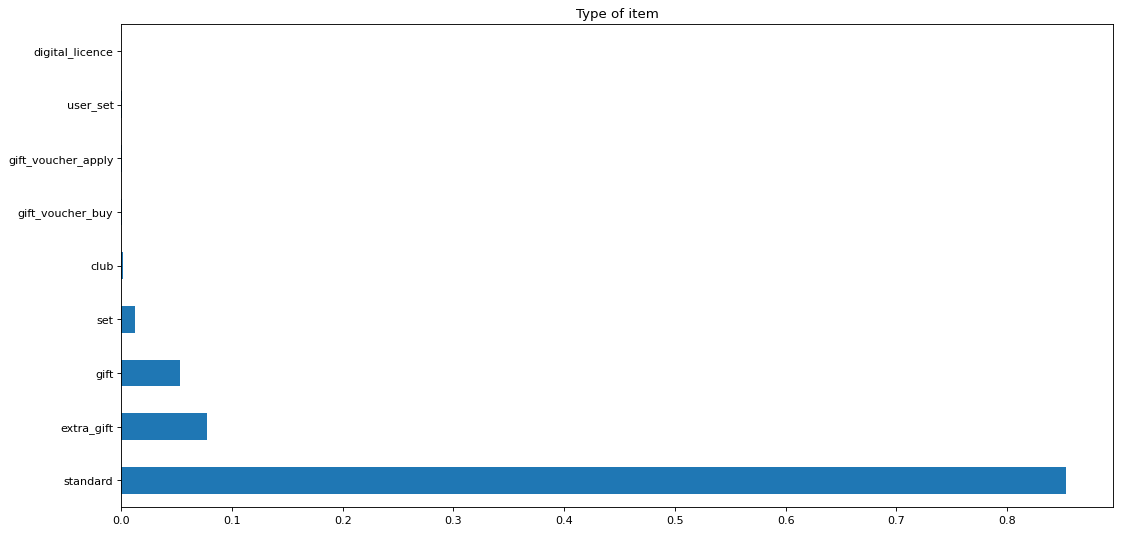

In [12]:
figure().patch.set_facecolor('white')
data.item_type.value_counts(normalize=True).plot(kind='barh', title='Type of item')
plt.show()

In [13]:
# We want to drop gifts as well as extra_gifts from orders, as they would mess up with machine learning (price of gifted product is usually 0).
# We are dropping club purchases for the same reason - those are gifts in a way, not necessarily purchases for money, so price is 0 again.

print(data[data.item_type == 'gift'].sort_values(by='item_unit_price_with_vat', ascending=False).item_unit_price_with_vat)

data = data[data.item_type != 'gift']
data = data[data.item_type != 'extra_gift']
data = data[data.item_type != 'club']

# Voucher buys and applies are dropped as well, since those are only other ways of payment method, not products.
data = data[data.item_type != 'gift_voucher_buy']
data = data[data.item_type != 'gift_voucher_apply']

# Merge set and user set, they work on the same principle.
data.item_type.replace('user_set', 'set', inplace=True)

2953       0.0
1396599    0.0
1396554    0.0
1396557    0.0
1396558    0.0
          ... 
610901     0.0
610902     0.0
610903     0.0
610904     0.0
3646337    0.0
Name: item_unit_price_with_vat, Length: 183130, dtype: float64


In [14]:
# We have only three types of items remaining now - standard, set and digital licence. All of those are classic sale types.
print(data.item_type.value_counts(normalize=True))

standard           0.984850
set                0.015103
digital_licence    0.000046
Name: item_type, dtype: float64


## Basket types

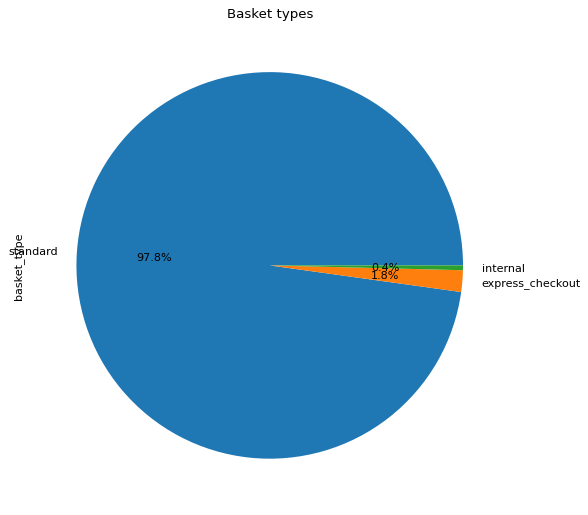

In [15]:
# Three different basket types. All of them are valid, made by customer - internal means some internal change (after the order was accepted) made thanks to user's request.
figure().patch.set_facecolor('white')
data.basket_type.value_counts().plot(kind='pie', title='Basket types', autopct='%1.1f%%')
plt.show()

## Currency
We would like to see what currency was the most used. All values will be convertet to EURos, but original, used, currencies will be still saved in the DataFrame.

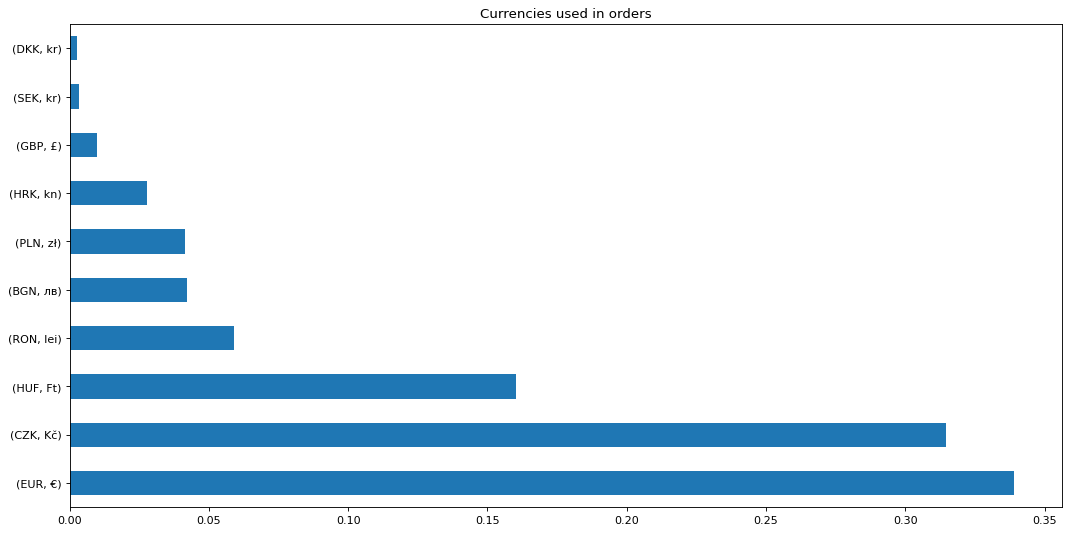

In [16]:
data[['currency_code', 'currency_symbol']].value_counts(normalize=True).plot(kind='barh', title='Currencies used in orders', xlabel='')
plt.show()

Change all prices to EUR so we can easily compare them.

In [17]:
non_eur_columns = ['order_price_without_vat', 'order_price_with_vat', 'basket_total_price_before_discount_with_vat', 
                   'basket_total_price_with_vat', 'item_unit_price_with_vat', 'item_unit_price_without_vat', 'item_total_discount_with_vat']

for column_name in non_eur_columns:
    data[column_name] =  round(data[column_name] / data.exchange_currency_rate, 2)

In [18]:
# Rename currency code column so it's clear they (original currencies) are not in use anymore
data.rename(columns={'currency_code': 'original_currency_code'}, inplace=True)

# Drop column that is not useful anymore 
data.drop('currency_symbol', inplace=True, axis=1)
data.drop('price_round_system', inplace=True, axis=1)

## Countries

Percentage of bill countries, with the threshold of 0.5% to be shown as bill country of an order.

Bill countries in data: ['BG' 'CZ' 'AT' 'DK' 'PL' 'HU' 'SI' 'SK' 'RO' 'IE' 'PT' 'HR' 'GB' 'DE'
 'FR' 'EL' 'IT' 'NL' 'LV' 'ES' 'FI' 'BE' 'SE' 'EE' 'GR' 'LT' 'LU' 'CH'
 'TR' 'UA' 'RS' 'BA'].
 That is 32 countries as bill countries.


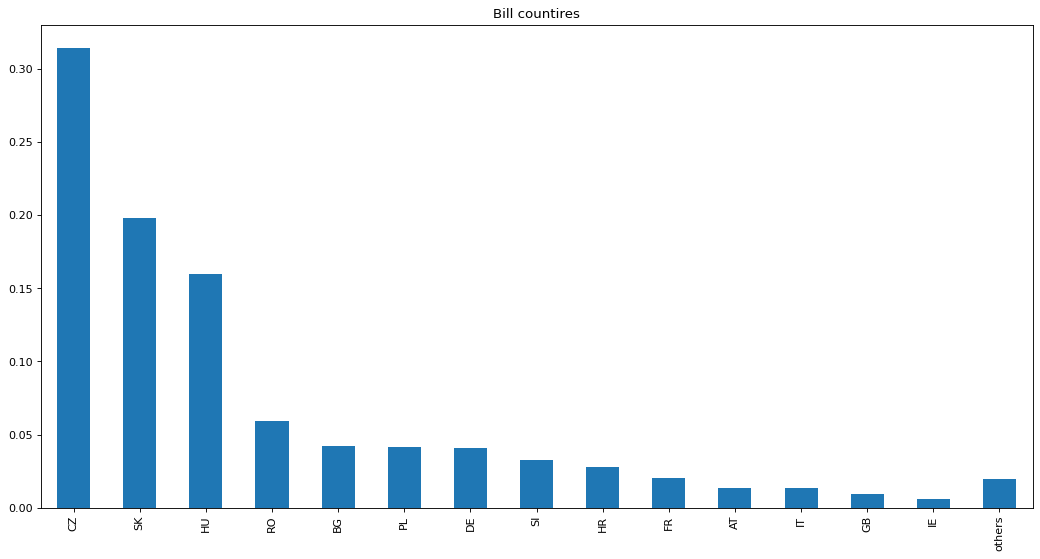

In [19]:
print(f'Bill countries in data: {data.bill_country.unique()}.\n That is {len(data.bill_country.unique())} countries as bill countries.')

figure().patch.set_facecolor('white')
counted_countries = create_others_value_counts(0.005, data, 'bill_country') 
counted_countries.plot(kind='bar', title='Bill countires')
plt.show()

## More info about products

In [20]:
true_false_columns = ['is_in_stock', 'is_ended', 'is_new', 'is_boosted', 'is_fifo']
data.replace(['t', 'f'], [True, False], inplace=True)   # replace T/F with boolean values
data[true_false_columns]

,is_in_stock,is_ended,is_new,is_boosted,is_fifo
0,True,False,False,False,False
1,False,False,False,False,False
2,True,False,False,False,False
3,True,False,False,False,False
4,True,True,False,False,False
...,...,...,...,...,...
3667149,True,False,False,False,False
3667150,False,True,False,False,False
3667151,False,False,False,False,False
3667152,True,False,False,False,False


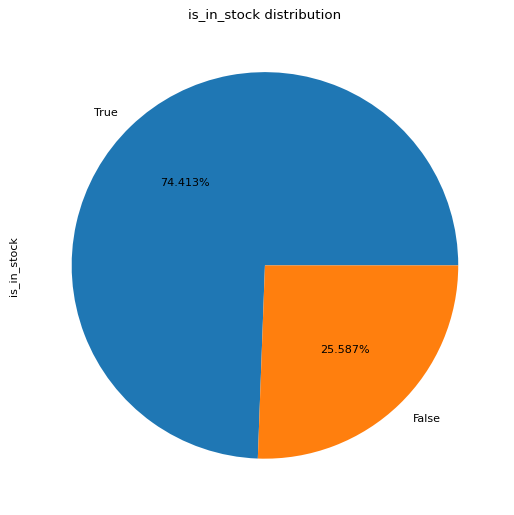

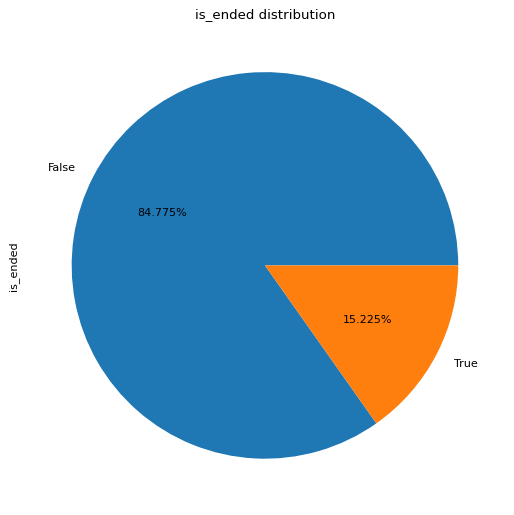

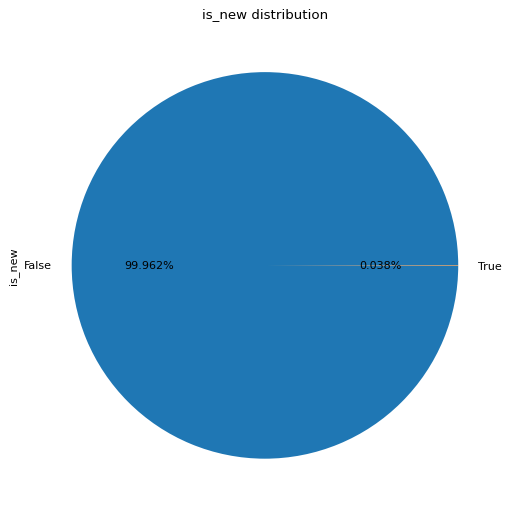

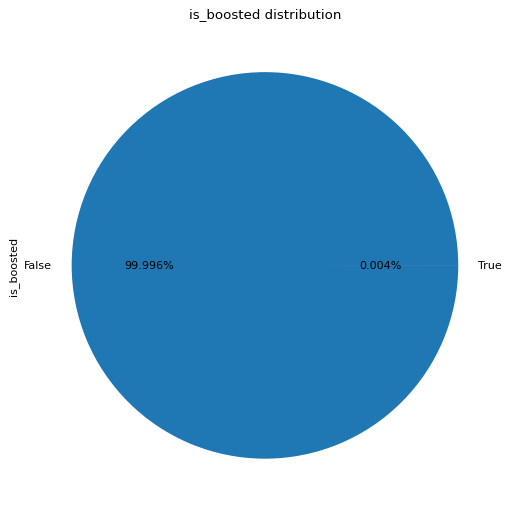

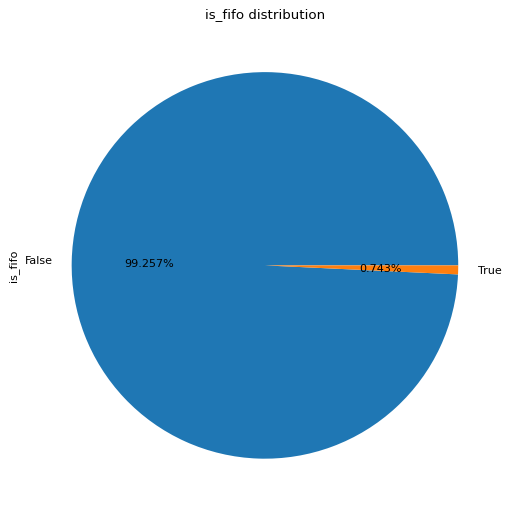

In [21]:
for col in true_false_columns:
    figure().patch.set_facecolor('white')
    data[col].value_counts().plot(kind='pie', title=f'{col} distribution', autopct='%1.3f%%')
    plt.show()

We can see several True/False information about products, which might be usefull in the future. 

For example we want to use ended product sales for model training, but not for evaluating the prediciton (as there are not new sales of ended products). \
Also FIFO products are important to note, as those are usually the products with shorter best before date. \
Boost and new are interesting as well, but there is probably too little amount of them to make significant difference (we will see later). 

In [22]:
tmp = data[data.product_status == 'ended'].is_ended
print(tmp.unique())

[ True]


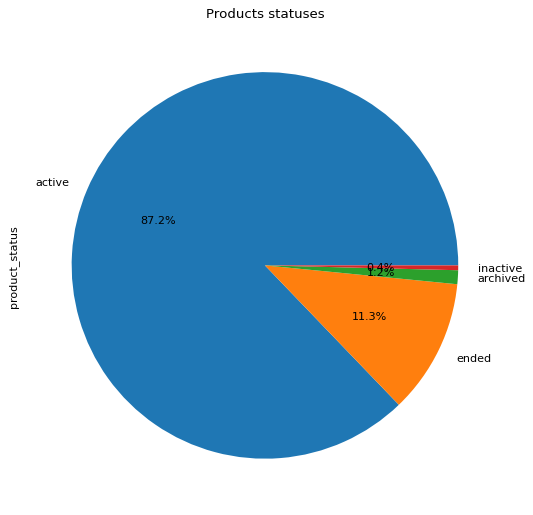

In [23]:
figure().patch.set_facecolor('white')
data.product_status.value_counts().plot(kind='pie', autopct='%1.1f%%', title='Products statuses')
plt.show()

If product status is ended, then is_ended is always True. \
Other combinations also occure, as shown belov - for example active but is_ended product mean that it is still available, but new pieces are not pruchased.

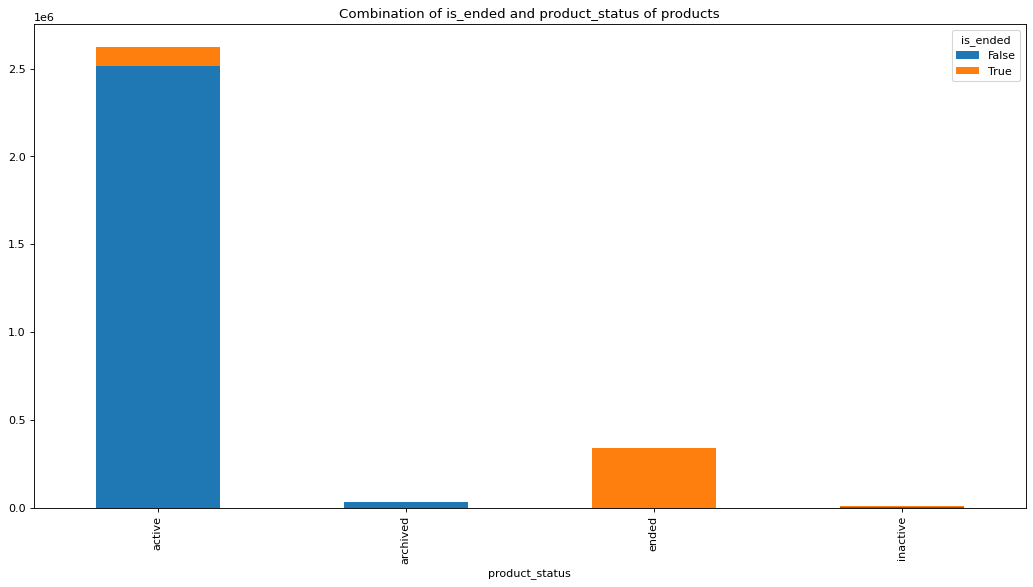

In [24]:
pd.crosstab(columns=data['is_ended'], index=data['product_status']).plot.bar(stacked=True, title='Combination of is_ended and product_status of products')
plt.show()

Normalized data just so we can see that there is multiple combinations of status, ended and stock.

In [25]:
data[['product_status','is_ended', 'is_in_stock']].value_counts(normalize=True)

product_status  is_ended  is_in_stock
active          False     True           0.709017
                          False          0.128169
ended           True      False          0.112652
active          True      True           0.034614
archived        False     False          0.009942
inactive        True      False          0.003060
archived        True      False          0.001542
inactive        False     False          0.000510
                True      True           0.000307
                False     True           0.000107
archived        True      True           0.000075
                False     True           0.000006
dtype: float64

In [26]:
# Top sold products alongside with their sale share.
print(data.product_name.value_counts(normalize=True).head(10))

Pick 'N' Strap                                    0.001745
2221 Regular Slinky                               0.001661
HA-37G                                            0.001613
C-1U USB Studio Condenser Microphone              0.001519
RS 20801 B                                        0.001433
EZ-900 Great American Bronze Wound Extra Light    0.001359
Scarlett Solo 3rd Generation                      0.001340
PSA1                                              0.001178
DG 006                                            0.001145
5005                                              0.001143
Name: product_name, dtype: float64


In [27]:
print(f'Amount of unique products sold {len(data.product_name.unique())}.')

Amount of unique products sold 164565.


 0.0    0.298048
 2.0    0.053309
 1.0    0.044903
 3.0    0.041928
 4.0    0.035519
 5.0    0.029770
 6.0    0.021567
 7.0    0.018728
-1.0    0.017490
 8.0    0.015858
Name: eshop_stock_count, dtype: float64


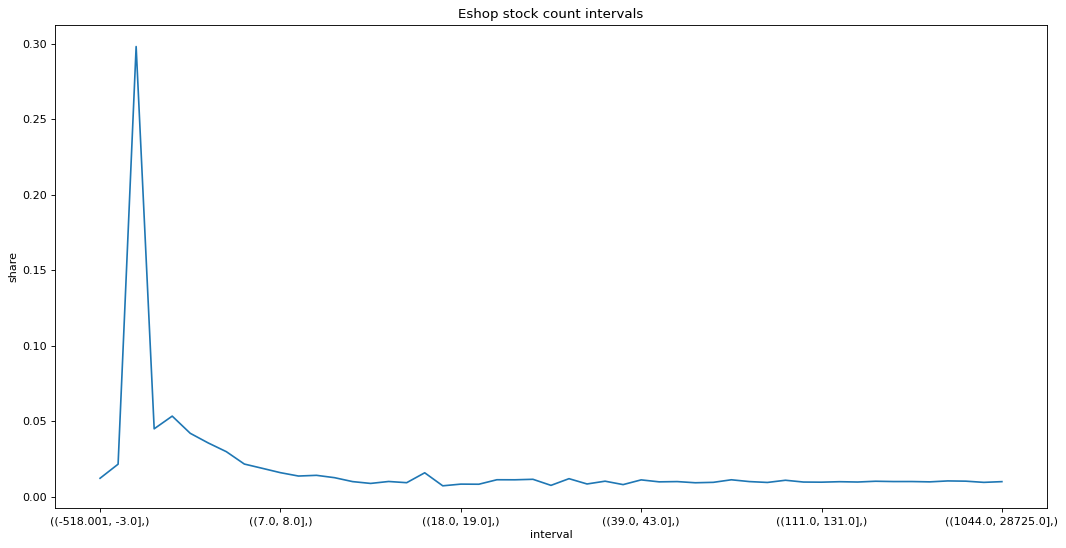

In [28]:
# Let's lok how the most common eshop stock count looks like - normalized numbers in value_counts.\
# Numbers lower than 0 mean that item was ordere even though it is not in stock currently.
pd.DataFrame(pd.qcut(np.array(data.eshop_stock_count), q=100, duplicates='drop')).value_counts(sort=False, normalize=True).plot(title='Eshop stock count intervals', xlabel='interval', ylabel='share')
plt.plot()

print(data.eshop_stock_count.value_counts(normalize=True).head(10))

11.90    0.004757
14.90    0.004731
19.90    0.003726
13.90    0.003647
15.90    0.003601
10.90    0.003561
0.69     0.003528
12.90    0.003499
17.90    0.003387
16.90    0.003063
Name: item_unit_price_with_vat, dtype: float64

Price distribution of products varies, from very cheap products to very expensive ones - 22799.0€ is the most expensive one


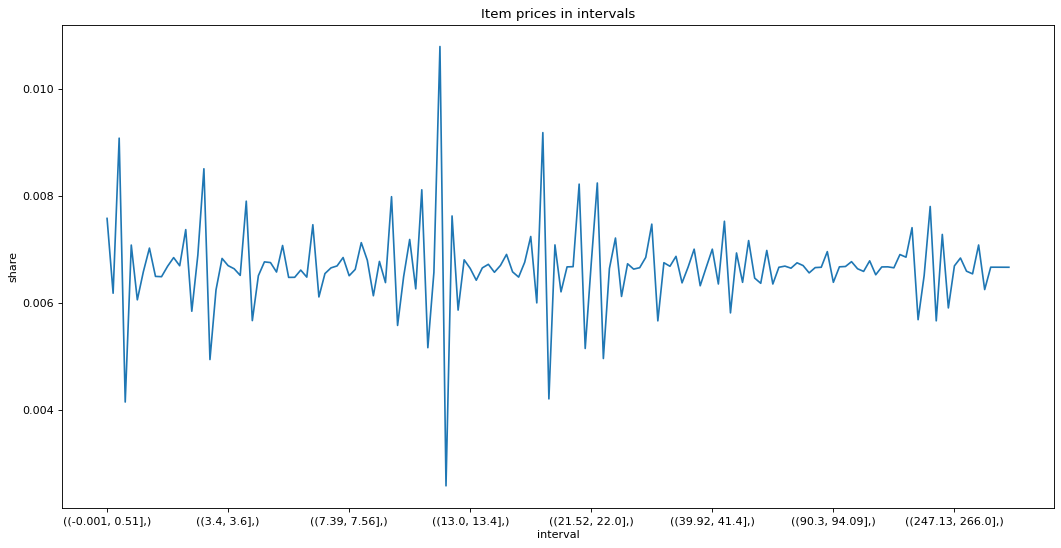

In [29]:
pd.DataFrame(pd.qcut(np.array(data.item_unit_price_with_vat), q=150, duplicates='drop')).value_counts(normalize=True, sort=False).plot(title='Item prices in intervals', xlabel='interval', ylabel='share')
plt.plot()

print(data.item_unit_price_with_vat.value_counts(normalize=True).head(10))

print(f'\nPrice distribution of products varies, from very cheap products to very expensive ones - {max(data.item_unit_price_with_vat)}€ is the most expensive one')

What is also important for us, not so much for the machine learning part, is the price we've purchased the product for. Let's have a look at it.

3.363000     0.001613
2.003128     0.001545
20.715880    0.001519
5.750000     0.001518
81.545000    0.001502
5.630000     0.001488
13.904040    0.001374
0.520000     0.001353
1.815000     0.001266
2.943505     0.001241
Name: product_purchase_price, dtype: float64


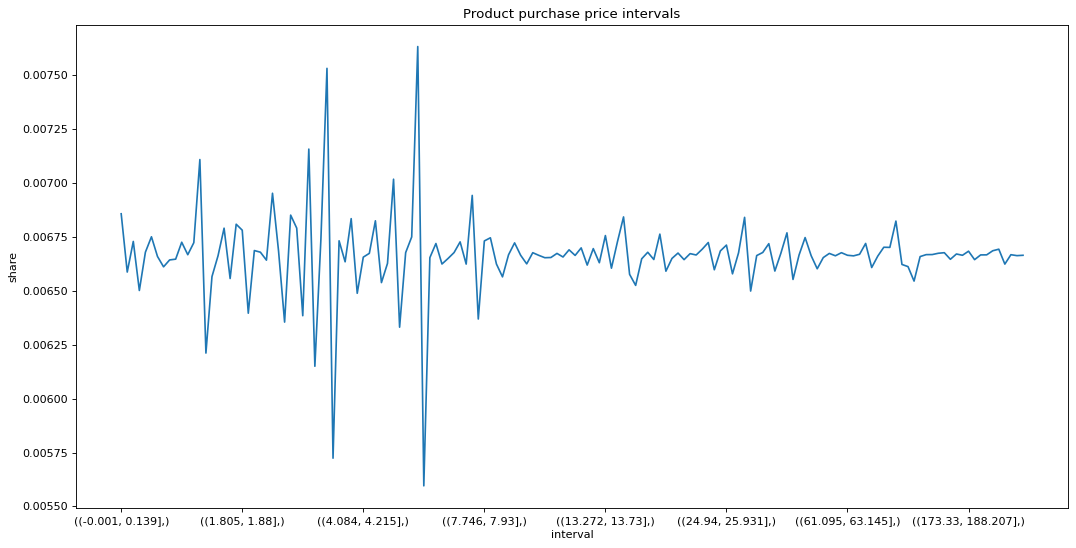

In [30]:
pd.DataFrame(pd.qcut(np.array(data.product_purchase_price), q=150, duplicates='drop')).value_counts(normalize=True, sort=False).plot(title='Product purchase price intervals', xlabel='interval', ylabel='share')
plt.plot()

print(data.product_purchase_price.value_counts(normalize=True).head(10))

3.363000     0.001613
2.003128     0.001545
20.715880    0.001519
5.750000     0.001518
81.545000    0.001502
5.630000     0.001488
13.904040    0.001374
0.520000     0.001353
1.815000     0.001266
2.943505     0.001241
Name: product_purchase_price, dtype: float64


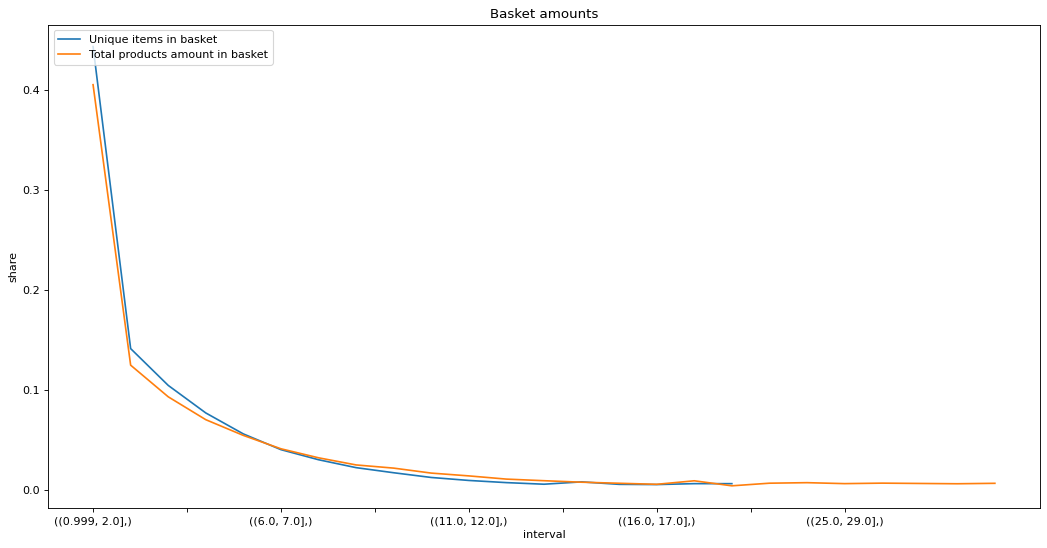

In [31]:
pd.DataFrame(pd.qcut(np.array(data.count_basket_items), q=150, duplicates='drop')).value_counts(normalize=True, sort=False).plot(title='Basket amounts', label='Unique items in basket', xlabel='interval', ylabel='share')
pd.DataFrame(pd.qcut(np.array(data.basket_count_products), q=150, duplicates='drop')).value_counts(normalize=True, sort=False).plot(label='Total products amount in basket', xlabel='interval', ylabel='share')

plt.legend(loc="upper left")
plt.plot()

print(data.product_purchase_price.value_counts(normalize=True).head(10))

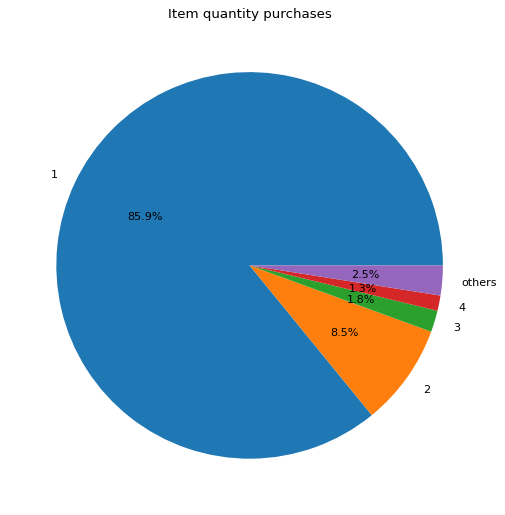

In [32]:
# We can see that item is only bought as 1 piece and with more pieces bought at once the occurence goes down too.
figure().patch.set_facecolor('white')
create_others_value_counts(0.01, data, 'item_quantity').plot(kind='pie', autopct='%1.1f%%', title='Item quantity purchases', ylabel='')
plt.show()

### Reviews

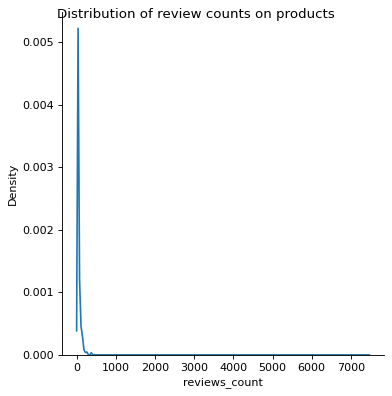

In [33]:
sns.displot(data.reviews_count, kind='kde').fig.suptitle('Distribution of review counts on products')
plt.show()

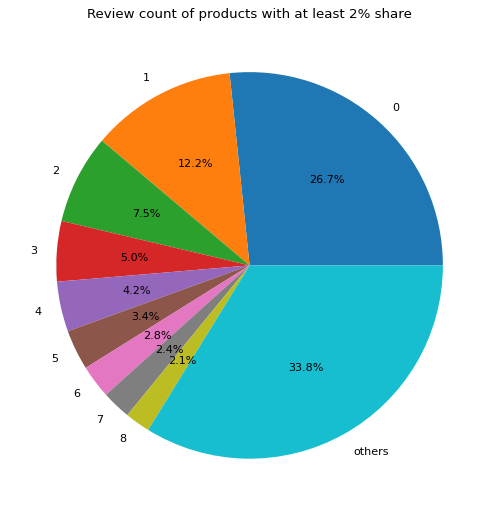

In [34]:
figure().patch.set_facecolor('white')
create_others_value_counts(0.02, data, 'reviews_count').plot(kind='pie', autopct='%1.1f%%', title='Review count of products with at least 2% share', label='')
plt.show()

<AxesSubplot:xlabel='reviews_count', ylabel='Density'>

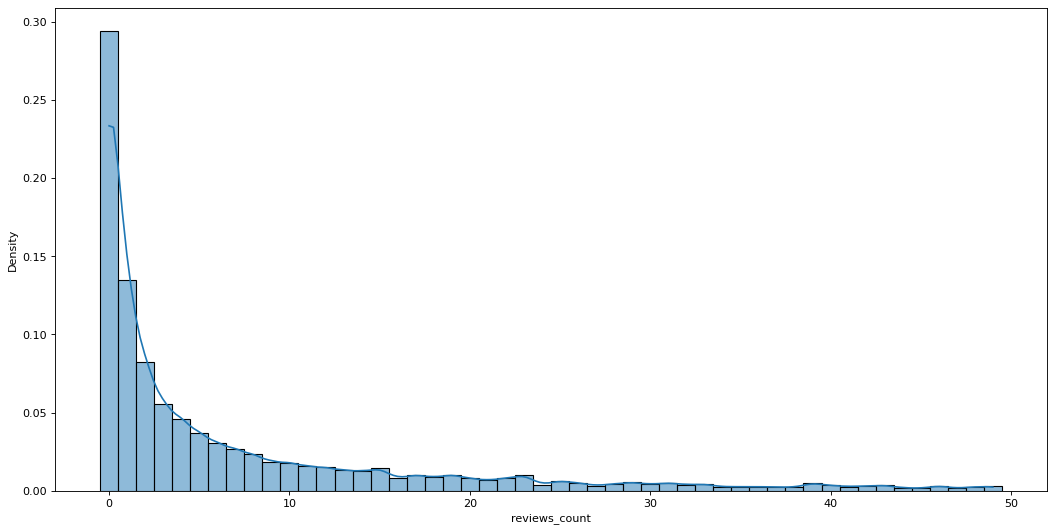

In [35]:
sns.histplot(data[data.reviews_count.__lt__(50)].reviews_count, kde=True, discrete=True, stat='density')
# Almost 30% of products got 0 reviews

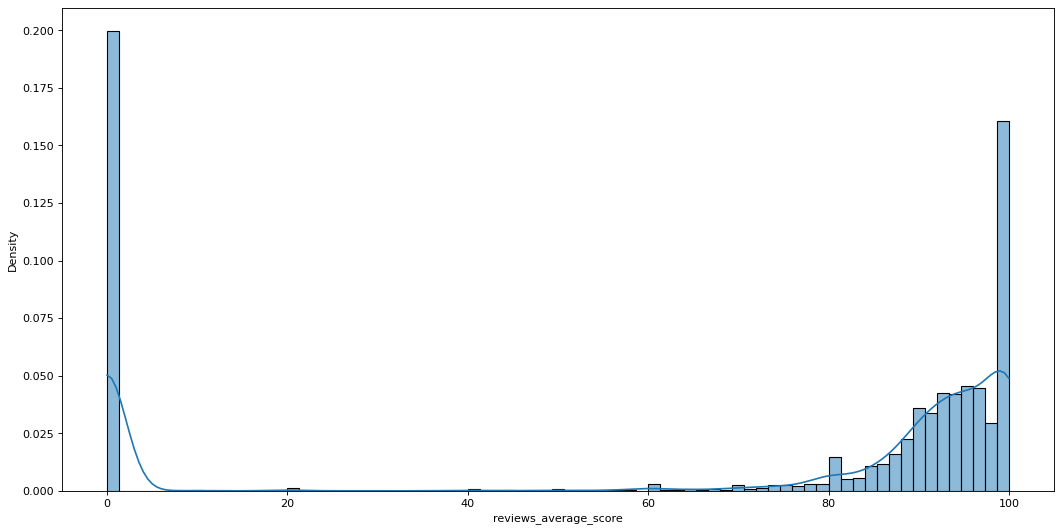

In [36]:
# some of the reviews are from an old eshop, that's why we can have higher than 0 score on product with 0 reviews
sns.histplot(data.reviews_average_score, kde=True, stat='density')
plt.show()

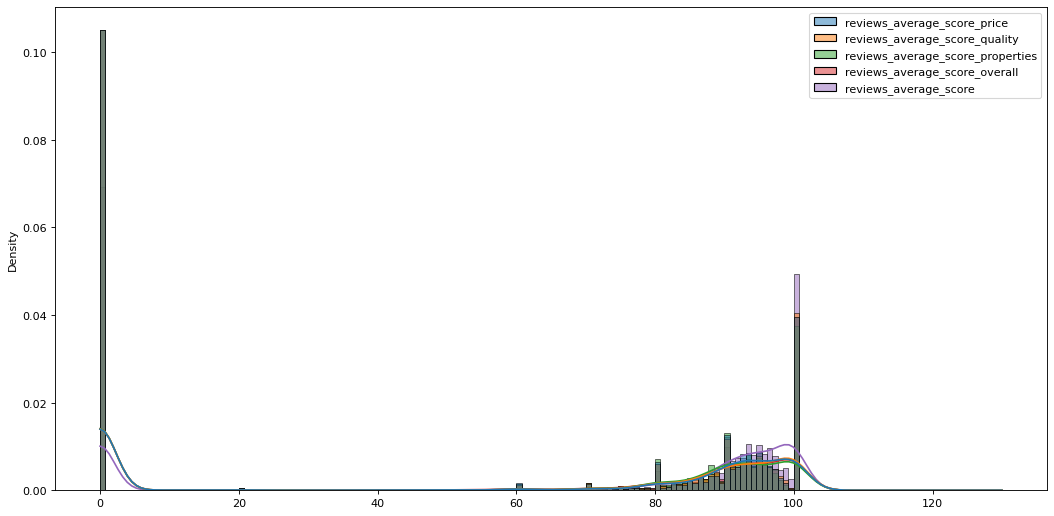

In [37]:
sns.histplot(data[['reviews_average_score_price', 'reviews_average_score_quality', 'reviews_average_score_properties', 'reviews_average_score_overall', 'reviews_average_score']], kde=True, stat='density')
plt.show()

There is many products without reviews, but if they get reviewed, it might indicate user's satisfaction with given product

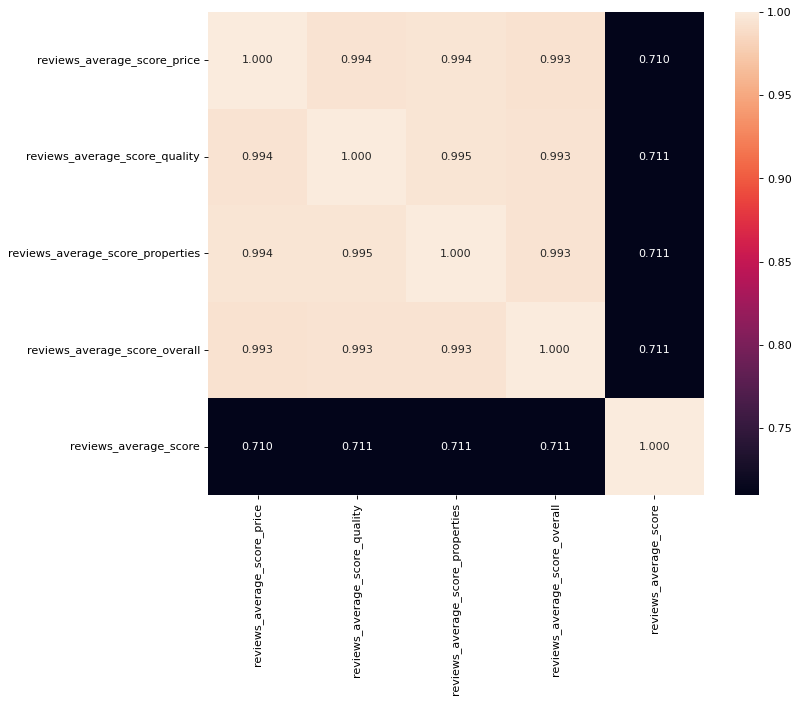

In [38]:
review_columns = [
 'reviews_average_score_price',
 'reviews_average_score_quality',
 'reviews_average_score_properties',
 'reviews_average_score_overall',
 'reviews_average_score']

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data[review_columns].corr(), ax=ax, annot=True, fmt=".3f")
plt.show()

review_columns.append('reviews_count')

# Dates of orders
We have two columns to determine order date - doc_cate and created_at. We don't need precise hour, day of purchase is enough

In [39]:
for row in range (len(data.index)):
    if data.doc_date[0].date() != data.created_at[0].date():
        print(row)

No output from cycle above shows that doc_date and created_at are on the same day, we can drop created_at as it also contains hours

In [40]:
data.drop('created_at', inplace=True, axis=1)

We have more than 3 years of daily data of sales.

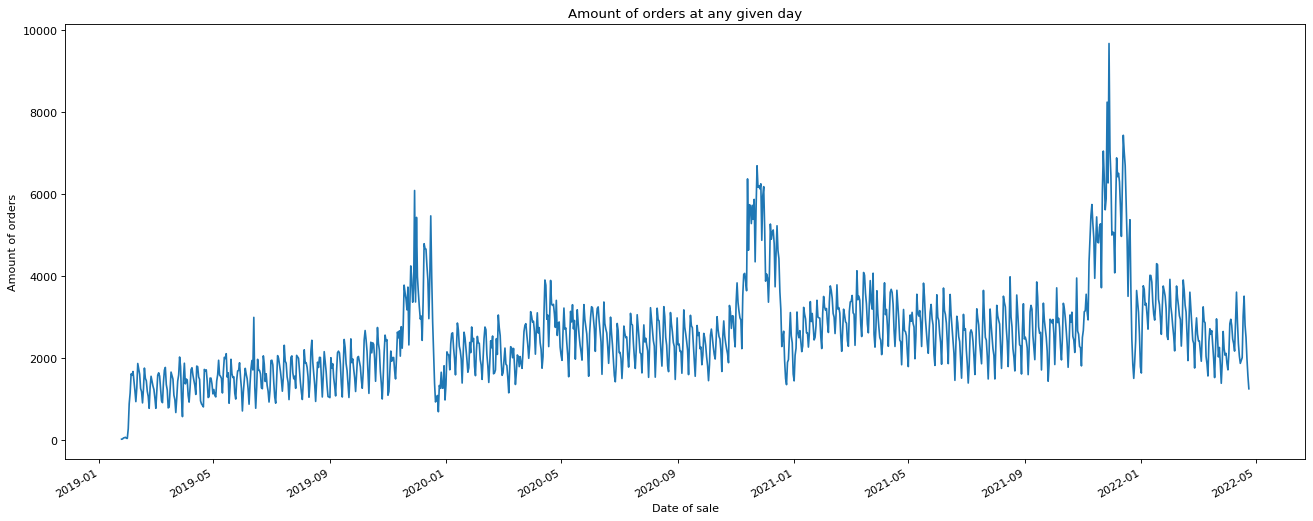

In [41]:
figure(figsize=(20, 8))
data.doc_date.value_counts().plot(xlabel='Date of sale', ylabel='Amount of orders', title = 'Amount of orders at any given day')
plt.show()

# Categories 

There is 2453 categories used.
LP Platne                            0.037510
Pletacia priadza                     0.023236
Hudobné a filmové tričká             0.022066
Hotové nástrojové káble              0.015887
Medium trsátka                       0.014900
Hotové mikrofónové káble             0.011918
USB zvukové karty                    0.011377
Hotové AUDIO káble                   0.011283
Struny pre elektrickú gitaru .010    0.010397
Sopránové Ukulele                    0.010300
Heavy trsátka                        0.010266
Light trsátka                        0.010202
others                               0.810656
dtype: float64


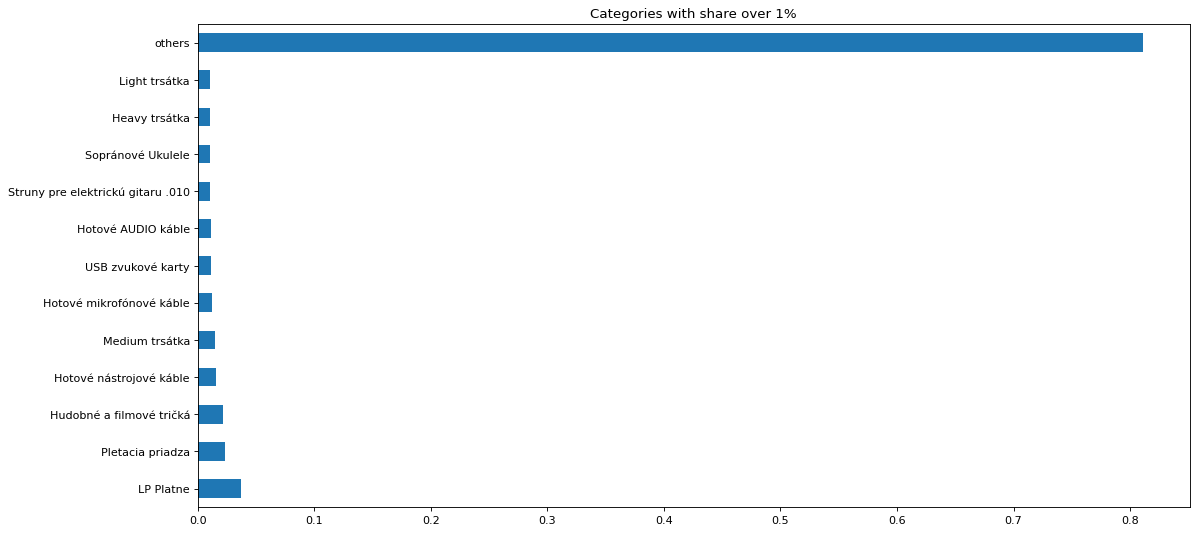

In [42]:
print(f'There is {len(data.category.unique())} categories used.')
create_others_value_counts(0.01, data, 'category').plot(kind='barh', title='Categories with share over 1%')
plt.plot()
print(create_others_value_counts(0.01, data, 'category'))

There is many categories used, but, as expected, products are distributed in between them, so even the biggest category (LP platne) doesn't reach even 4% share. \
I expect categories to be useful in product distribution and ML.

Categories are also stored in the category tree, so let's have a look how deep in the tree they are.

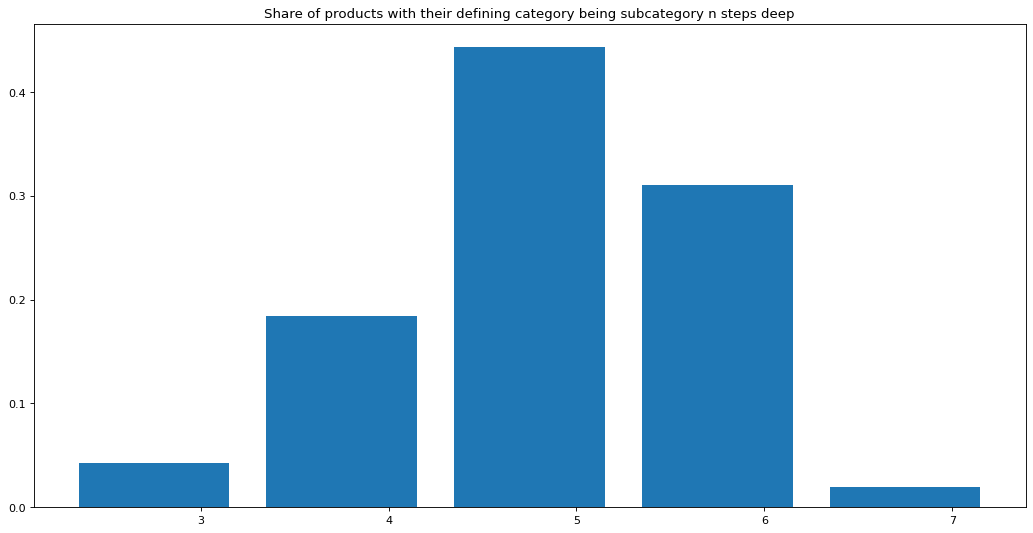

In [43]:
distribution = [len(i) for i in list(data.tree_path)]
occurrence = []
for value in list(set(distribution)):
    occurrence.append(distribution.count(value))

plt.bar([i/4 +1 for i in list(set(distribution))], [float(i)/sum(occurrence) for i in occurrence])
plt.title('Share of products with their defining category being subcategory n steps deep')
plt.show()

In [44]:
print(f'There was {len(data.shop_basket_id.unique())} unique baskets ordered - total amount of orders.')

There was 1266172 unique baskets ordered - total amount of orders.


In [45]:
print('Standard default warranty is 24 months, which is also true in almost all categories but one')
print(data[['catalog_category_id', 'default_warranty_period']].drop_duplicates().default_warranty_period.value_counts())

print('\n\nAlso used categories are almost all active. Inactive category doesn\'t mean inactive products, but rather ending usage of the category.')
print(data[['catalog_category_id', 'category_status']].drop_duplicates().category_status.value_counts())

Standard default warranty is 24 months, which is also true in almost all categories but one
24.0    2454
1.0        1
Name: default_warranty_period, dtype: int64


Also used categories are almost all active. Inactive category doesn't mean inactive products, but rather ending usage of the category.
active      2450
inactive       5
Name: category_status, dtype: int64


Columns default_warranty_period and category_status are not very wide, they offer very little differences, so we will probably drop them later.

# Money spent on orders

There are 4 columns totaling the price of shopping - order_price_without_vat, order_price_with_vat, basket_total_price_before_discount_with_vat, basket_total_price_with_vat. \
For the purpose of summing the purchase, one of them is enoug - the best will be basket_total_price_with_vat. \
We are working with vat prices of products too and we are not going to include shipping costs (which are included in order price), but rather only total price of products in baskets.

Median basket price with vat 91.05 €
Mean basket price with vat 206.03 €


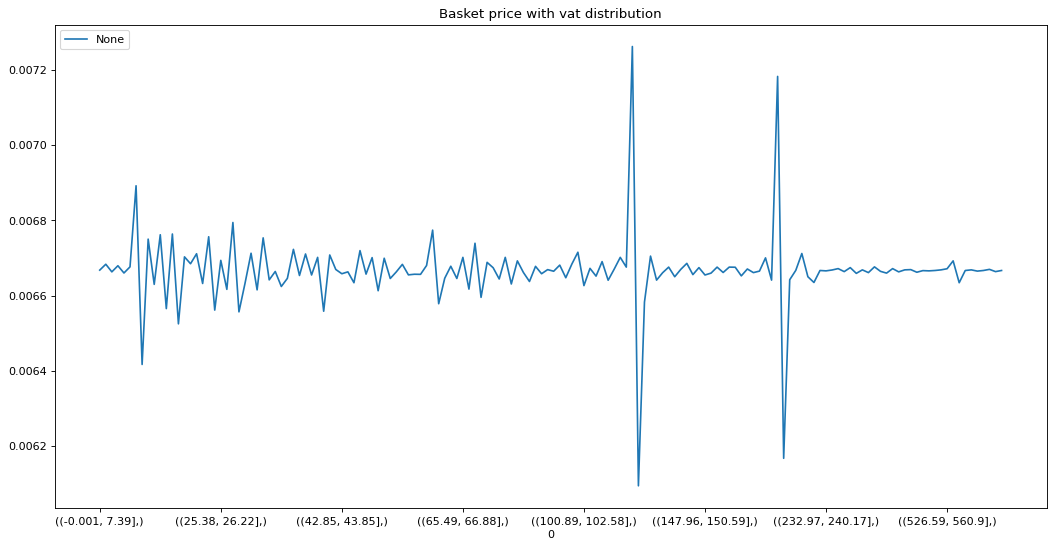

In [46]:
# We can drop all other summing columns
data.drop('order_price_without_vat', axis=1, inplace=True)
data.drop('order_price_with_vat', axis=1, inplace=True)
data.drop('basket_total_price_before_discount_with_vat', axis=1, inplace=True)

pd.DataFrame(pd.qcut(np.array(data.basket_total_price_with_vat), q=150, duplicates='drop')).value_counts(normalize=True, sort=False).plot(title='Basket price with vat distribution')
plt.legend(loc="upper left")
plt.plot()

print(f'Median basket price with vat {round(data.basket_total_price_with_vat.median(), 2)} €')
print(f'Mean basket price with vat {round(data.basket_total_price_with_vat.mean(), 2)} €')

## Brands

In [47]:
# calculate how many brands there are as well as the most common
print(f'There is {len(data.brand_name)} brands.')
print(data.brand_name.value_counts())

There is 3005831 brands.
Fender               136327
Dunlop               101351
Soundking             84811
Behringer             64049
D'Addario             57632
                      ...  
Peter Frampton            1
Madeleine Peyroux         1
Coercion 96               1
Sandra Roberts            1
Synthogy                  1
Name: brand_name, Length: 5336, dtype: int64


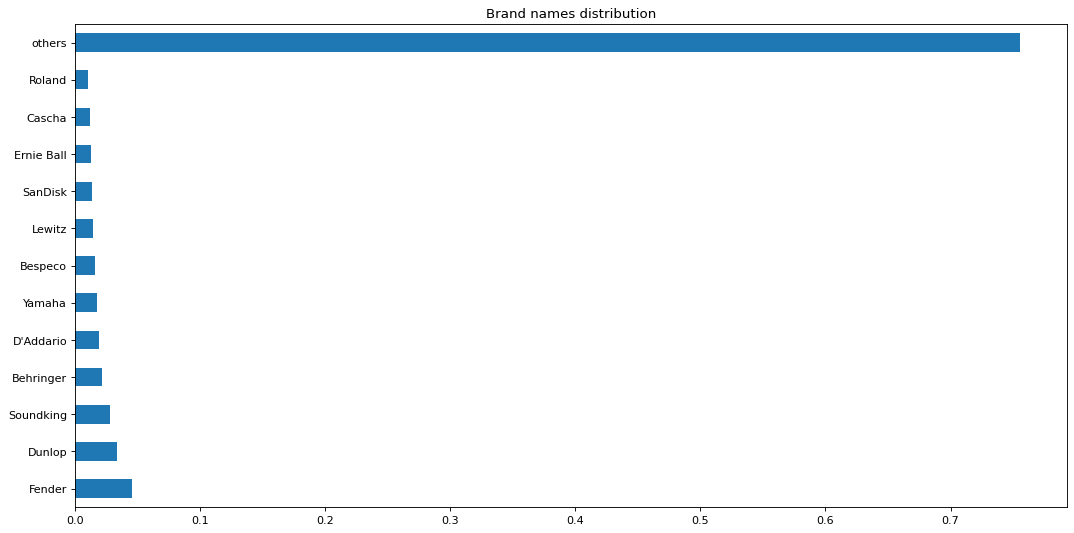

In [48]:
create_others_value_counts(0.01, data, 'brand_name').plot(kind='barh', title='Brand names distribution')
plt.show()

As we can see above, there is HUGE variety of brands in products with only few of them having more than 1% of products.

## Segments

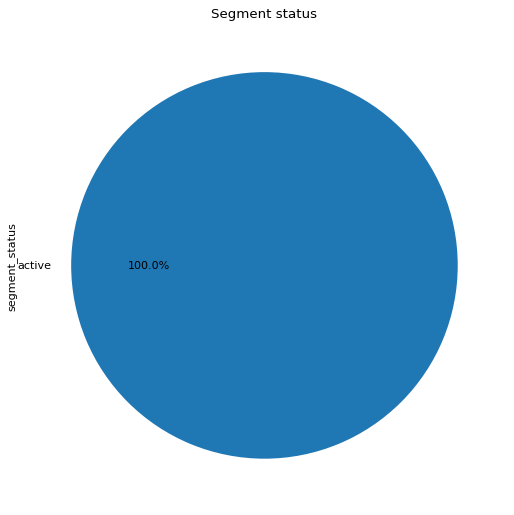

In [49]:
figure().patch.set_facecolor('white')
data.segment_status.value_counts().plot(kind='pie', autopct='%1.1f%%', title='Segment status')
plt.show()

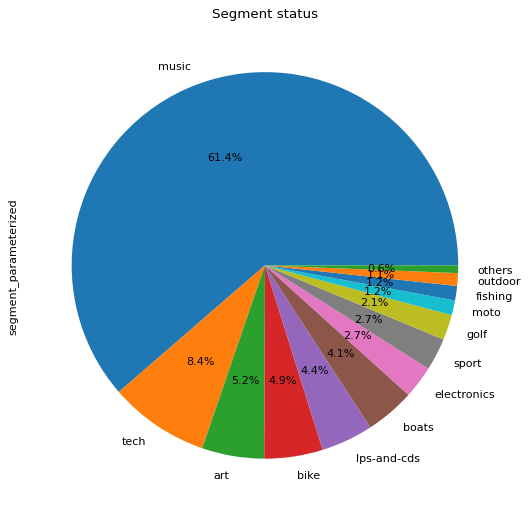

In [50]:
figure().patch.set_facecolor('white')
create_others_value_counts(0.01, data, 'segment_parameterized').plot(kind='pie', autopct='%1.1f%%', title='Segment status', label='segment_parameterized')
plt.show()

In [51]:
print('Active and inactive segments from the data.')
data[['segment_parameterized', 'segment_status']].drop_duplicates().sort_values(by='segment_status')

Active and inactive segments from the data.


,segment_parameterized,segment_status
0,music,active
8,general,active
11,tech,active
21,sport,active
24,electronics,active
26,lps-and-cds,active
43,boats,active
64,bike,active
80,outdoor,active
81,kids,active


As of now, segment status is active for all of the segments, so we can drop this column as well, it will not be used as feature.

In [52]:
data.drop('segment_status', inplace=True, axis=1)

In [53]:
data.to_csv('data/data_after_EDA.csv', index=False)